# Project PICOM

## Import the libraries and files

In [ ]:
import geopandas as gpd
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
#Import the files
camera_df = gpd.read_file(r"C:\Users\thier\Downloads\Projet\Projet\Cameras.shp")
rivieres = gpd.read_file(r"C:\Users\thier\Downloads\Projet\Projet\Rivieres.shp")
roads = gpd.read_file(r"C:\Users\thier\Downloads\Projet\Projet\Reseau_Routier.shp")
railroad = gpd.read_file(r"C:\Users\thier\Downloads\Projet\Projet\Reseau_Ferroviaire.shp")
slope = gpd.read_file(r"C:\Users\thier\Downloads\Projet\Projet\Pente.shp")
landcover = gpd.read_file(r"C:\Users\thier\Downloads\Projet\Projet\Type_Couverture.shp")
sol = gpd.read_file(r"C:\Users\thier\Downloads\Projet\Projet\utilisation_territoire2.shp")


In [ ]:
#export the camera dataframe
camera_df.to_file(r"C:\Users\thier\Downloads\Projet\Projet\points.shp", )
camera_df

In [ ]:
roads.plot()    

In [ ]:
camera_df

In [ ]:
camera_df = camera_df.set_index("Site")

In [ ]:
camera_df.plot()

In [ ]:
#Make sure the projection is the right one
camera_df = camera_df.to_crs('EPSG:26918')

### Create buffers of 500m, 1km and 2km

In [ ]:
#Create buffers for each cameras
buffered_geometries_500m = camera_df.geometry.apply(lambda geom: geom.buffer(500))
buffered_geometries_1km = camera_df.geometry.apply(lambda geom: geom.buffer(1000))
buffered_geometries_2km = camera_df.geometry.apply(lambda geom: geom.buffer(2000))

# Create GeoDataFrames for each buffer
buffered_camera_df_500m = gpd.GeoDataFrame(geometry=buffered_geometries_500m, crs=camera_df.crs)
buffered_camera_df_1km = gpd.GeoDataFrame(geometry=buffered_geometries_1km, crs=camera_df.crs)
buffered_camera_df_2km = gpd.GeoDataFrame(geometry=buffered_geometries_2km, crs=camera_df.crs)


In [ ]:
#Export the buffers shp
buffered_camera_df_500m.to_file(r"C:\Users\thier\Downloads\Projet\Projet\buffers_500m.shp")
buffered_camera_df_1km.to_file(r"C:\Users\thier\Downloads\Projet\Projet\buffers_1km.shp")
buffered_camera_df_2km.to_file(r"C:\Users\thier\Downloads\Projet\Projet\buffers_2km.shp")

In [ ]:
buffered_camera_df_500m = buffered_camera_df_500m.reset_index().rename(columns={'index': 'camera'}) 
buffered_camera_df_1km = buffered_camera_df_1km.reset_index().rename(columns={'index': 'camera'})
buffered_camera_df_2km = buffered_camera_df_2km.reset_index().rename(columns={'index': 'camera'})


In [ ]:
buffered_camera_df_1km

In [ ]:
# Create a new column 'id' with index values for 500m, 1km and 2km buffers
buffered_camera_df_500m['id'] = buffered_camera_df_500m.index
buffered_camera_df_500m
buffered_camera_df_1km['id'] = buffered_camera_df_1km.index
buffered_camera_df_1km
buffered_camera_df_2km['id'] = buffered_camera_df_2km.index
buffered_camera_df_2km

## Rivers

### Set the rivers shp projection

In [ ]:
print("CRS of rivieres:", rivieres.crs)
print("CRS of buffered_camera_df_500m:", buffered_camera_df_500m.crs)

In [ ]:
if rivieres.crs is None:
    rivieres.crs = 'EPSG:26918'
rivieres = rivieres.to_crs(buffered_camera_df_500m.crs)

### Rivers buffers 500m

In [ ]:
import geopandas as gpd
import pandas as pd

# Replace rivieres_1km with rivieres_500m, and buffered_camera_df_1km with buffered_camera_df_500m
rivieres_500m = rivieres.overlay(buffered_camera_df_500m, how='intersection')
rivieres_500m['length'] = rivieres_500m.geometry.length

# Ensure that 'Site' and other necessary columns are included
rivieres_500m_clean = rivieres_500m[['Site', 'length', 'geometry']]
rivieres_500m_sum = rivieres_500m_clean.dissolve(by='Site', aggfunc='sum')

# Update the file paths in the to_file and to_csv methods
rivieres_500m_sum.to_file(r"C:\Users\thier\Downloads\Projet\rivieres_buffers_500m.shp")
rivieres_500m_sum.to_csv(r"C:\Users\thier\Downloads\Projet\rivieres_buffers_500m.csv")

# Print the result and plot it
print(rivieres_500m_sum)
rivieres_500m_sum.plot()


### Rivers buffers 1km   

In [ ]:
import geopandas as gpd
import pandas as pd

# Replace rivieres_2km with rivieres_1km, and buffered_camera_df_2km with buffered_camera_df_1km
rivieres_1km = rivieres.overlay(buffered_camera_df_1km, how='intersection')
rivieres_1km['length'] = rivieres_1km.geometry.length

# Ensure that 'Site' and other necessary columns are included
rivieres_1km_clean = rivieres_1km[['Site', 'length', 'geometry']]
rivieres_1km_sum = rivieres_1km_clean.dissolve(by='Site', aggfunc='sum')

# Update the file paths in the to_file and to_csv methods
rivieres_1km_sum.to_file(r"C:\Users\thier\Downloads\Projet\rivieres_buffers_1km.shp")
rivieres_1km_sum.to_csv(r"C:\Users\thier\Downloads\Projet\rivieres_buffers_1km.csv")

# Print the result and plot it
print(rivieres_1km_sum)
rivieres_1km_sum.plot()


### Rivers buffers 2km

In [ ]:
import geopandas as gpd
import pandas as pd

# Replace roads_2km with rivieres_2km, and ensure buffered_camera_df_2km is correct
rivieres_2km = rivieres.overlay(buffered_camera_df_2km, how='intersection')
rivieres_2km['length'] = rivieres_2km.geometry.length

# Ensure that 'Site' and other necessary columns are included
rivieres_2km_clean = rivieres_2km[['Site', 'length', 'geometry']]
rivieres_2km_sum = rivieres_2km_clean.dissolve(by='Site', aggfunc='sum')

# Update the file paths in the to_file and to_csv methods
rivieres_2km_sum.to_file(r"C:\Users\thier\Downloads\Projet\rivieres_buffers_2km.shp")
rivieres_2km_sum.to_csv(r"C:\Users\thier\Downloads\Projet\rivieres_buffers_2km.csv")

# Print the result and plot it
print(rivieres_2km_sum)
rivieres_2km_sum.plot()


### ALL 3 buffers at the same time with a for loop

In [ ]:
import openpyxl

In [ ]:
import geopandas as gpd
import pandas as pd

def process_buffers(buffer_df, buffer_name, rivers_gdf, output_csv_path):
    results_df = pd.DataFrame(columns=["Buffer Index", "Clipped Length"])
    clipped_results_gdf = gpd.GeoDataFrame()

    for selected_buffer_index in range(len(buffer_df)):
        selected_buffer = buffer_df.iloc[selected_buffer_index:selected_buffer_index + 1]
        clipped_shp = gpd.overlay(rivers_gdf, selected_buffer, how='intersection')
        clipped_length = clipped_shp.length.sum()
        print(f"{buffer_name} - Buffer Index {selected_buffer_index}: Clipped Length = {clipped_length}")

        results_df = pd.concat([results_df, pd.DataFrame({"Buffer Index": [selected_buffer_index], "Clipped Length": [clipped_length]})], ignore_index=True)
        clipped_results_gdf = gpd.GeoDataFrame(pd.concat([clipped_results_gdf, clipped_shp]), crs=rivers_gdf.crs)

    results_df.to_csv(output_csv_path, index=False)

process_buffers(buffered_camera_df_500m, "Rivers buffers 500m", rivieres, r"C:\Users\thier\Downloads\Projet\Projet\rivers_buffers_500m_test2.csv")
process_buffers(buffered_camera_df_1km, "Rivers buffers 1km", rivieres, r"C:\Users\thier\Downloads\Projet\Projet\rivers_buffers_1km_test2.csv")
process_buffers(buffered_camera_df_2km, "Rivers buffers 2km", rivieres, r"C:\Users\thier\Downloads\Projet\\Projet\rivers_buffers_2km_test2.csv")

## Roads

In [ ]:
print("CRS of roads:", roads.crs)
print("CRS of buffered_camera_df_500m:", buffered_camera_df_1km.crs)

In [ ]:
if roads.crs is None:
    roads.crs = 'EPSG:26918'
roads = roads.to_crs(buffered_camera_df_1km.crs)

### Roads buffers 500m

In [ ]:
import geopandas as gpd
import pandas as pd

# Replace railroad_500m with roads_500m, and ensure buffered_camera_df_500m is correct
roads_500m = roads.overlay(buffered_camera_df_500m, how='intersection')
roads_500m['length'] = roads_500m.geometry.length

# Ensure that 'Site' and other necessary columns are included
roads_500m_clean = roads_500m[['Site', 'length', 'geometry']]
roads_500m_sum = roads_500m_clean.dissolve(by='Site', aggfunc='sum')

# Update the file paths in the to_file and to_csv methods
roads_500m_sum.to_file(r"C:\Users\thier\Downloads\Projet\roads_buffers_500m.shp")
roads_500m_sum.to_csv(r"C:\Users\thier\Downloads\Projet\roads_buffers_500m.csv")

# Print the result and plot it
print(roads_500m_sum)
roads_500m_sum.plot()


### Roads buffers 1km

In [ ]:
import geopandas as gpd
import pandas as pd

# Replace roads_500m with roads_1km, and buffered_camera_df_500m with buffered_camera_df_1km
roads_1km = roads.overlay(buffered_camera_df_1km, how='intersection')
roads_1km['length'] = roads_1km.geometry.length

# Ensure that 'Site' and other necessary columns are included
roads_1km_clean = roads_1km[['Site', 'length', 'geometry']]
roads_1km_sum = roads_1km_clean.dissolve(by='Site', aggfunc='sum')

# Update the file paths in the to_file and to_csv methods
roads_1km_sum.to_file(r"C:\Users\thier\Downloads\Projet\roads_buffers_1km.shp")
roads_1km_sum.to_csv(r"C:\Users\thier\Downloads\Projet\roads_buffers_1km.csv")

# Print the result and plot it
print(roads_1km_sum)
roads_1km_sum.plot()


### Roads buffers 2km

In [ ]:
import geopandas as gpd
import pandas as pd

# Replace roads_1km with roads_2km, and buffered_camera_df_1km with buffered_camera_df_2km
roads_2km = roads.overlay(buffered_camera_df_2km, how='intersection')
roads_2km['length'] = roads_2km.geometry.length

# Ensure that 'Site' and other necessary columns are included
roads_2km_clean = roads_2km[['Site', 'length', 'geometry']]
roads_2km_sum = roads_2km_clean.dissolve(by='Site', aggfunc='sum')

# Update the file paths in the to_file and to_csv methods
roads_2km_sum.to_file(r"C:\Users\thier\Downloads\Projet\roads_buffers_2km.shp")
roads_2km_sum.to_csv(r"C:\Users\thier\Downloads\Projet\roads_buffers_2km.csv")

# Print the result and plot it
print(roads_2km_sum)
roads_2km_sum.plot()


## Railroads

In [ ]:
print("CRS of roads:", railroad.crs)
print("CRS of buffered_camera_df_500m:", buffered_camera_df_1km.crs)

In [ ]:
if railroad.crs is None:
    railroad.crs = 'EPSG:26918'
railroad = railroad.to_crs(buffered_camera_df_1km.crs)

### Railroad buffer 500m

In [ ]:
import geopandas as gpd
import pandas as pd

# Replace railroad_1km with railroad_500m, and buffered_camera_df_1km with buffered_camera_df_500m
railroad_500m = railroad.overlay(buffered_camera_df_500m, how='intersection')
railroad_500m['length'] = railroad_500m.geometry.length

# Ensure that 'Site' and other necessary columns are included
railroad_500m_clean = railroad_500m[['Site', 'length', 'geometry']]
railroad_500m_sum = railroad_500m_clean.dissolve(by='Site', aggfunc='sum')

# Update the file paths in the to_file and to_csv methods
railroad_500m_sum.to_file(r"C:\Users\thier\Downloads\Projet\railroad_buffers_500m.shp")
railroad_500m_sum.to_csv(r"C:\Users\thier\Downloads\Projet\railroad_buffers_500m.csv")

# Print the result and plot it
print(railroad_500m_sum)
railroad_500m_sum.plot()



### Railroad buffers 1km

In [ ]:
import geopandas as gpd
import pandas as pd

# Replace railroad_2km with railroad_1km, and buffered_camera_df_2km with buffered_camera_df_1km
railroad_1km = railroad.overlay(buffered_camera_df_1km, how='intersection')
railroad_1km['length'] = railroad_1km.geometry.length

# Ensure that 'Site' and other necessary columns are included
railroad_1km_clean = railroad_1km[['Site', 'length', 'geometry']]
railroad_1km_sum = railroad_1km_clean.dissolve(by='Site', aggfunc='sum')

# Update the file paths in the to_file and to_csv methods
railroad_1km_sum.to_file(r"C:\Users\thier\Downloads\Projet\railroad_buffers_1km.shp")
railroad_1km_sum.to_csv(r"C:\Users\thier\Downloads\Projet\railroad_buffers_1km.csv")

# Print the result and plot it
print(railroad_1km_sum)
railroad_1km_sum.plot()


### Railroad buffers 2km

In [ ]:
import geopandas as gpd
import pandas as pd

# Replace railroad_1km with railroad_2km, and buffered_camera_df_1km with buffered_camera_df_2km
railroad_2km = railroad.overlay(buffered_camera_df_2km, how='intersection')
railroad_2km['length'] = railroad_2km.geometry.length

# Ensure that 'Site' and other necessary columns are included
railroad_2km_clean = railroad_2km[['Site', 'length', 'geometry']]
railroad_2km_sum = railroad_2km_clean.dissolve(by='Site', aggfunc='sum')


# Update the file paths in the to_file and to_csv methods
railroad_2km_sum.to_file(r"C:\Users\thier\Downloads\Projet\railroad_buffers_2km_2.shp")
railroad_2km_sum.to_csv(r"C:\Users\thier\Downloads\Projet\railroad_buffers_2km.csv")

# Print the result and plot it
print(railroad_2km_sum)
railroad_2km_sum.plot()


In [ ]:
railroad_2km_clean = railroad_2km[['Site', 'length', 'geometry']]

In [ ]:
railroad_2km_clean

In [ ]:
railroad_2km

In [ ]:
import geopandas as gpd
import pandas as pd

# Join the railroad data with the individual buffers
railroad_buffers_join_2km = gpd.sjoin(railroad, buffered_camera_df_2km, how='inner', predicate='intersects')

# Calculate the length of each railroad segment
railroad_buffers_join_2km['length'] = railroad_buffers_join_2km.geometry.length

# Create an empty GeoDataFrame for the results
results = gpd.GeoDataFrame(columns=railroad_buffers_join_2km.columns)

# Iterate over each buffer and process individually
for buffer_id, buffer_geom in buffered_camera_df_2km.iterrows():
    # Clip the railroad data to the current buffer
    clipped_railroad = railroad_buffers_join_2km[railroad_buffers_join_2km.intersects(buffer_geom.geometry)]

    # Ensure clipped_railroad is a GeoDataFrame
    if not isinstance(clipped_railroad, gpd.GeoDataFrame):
        clipped_railroad = gpd.GeoDataFrame(clipped_railroad)

    # Add the clipped data to the results GeoDataFrame
    results = pd.concat([results, clipped_railroad])

# Drop duplicates to handle overlaps
# Replace 'railroad_id' and 'buffer_id' with actual column names
#results = results.drop_duplicates(subset=['railroad_id', 'buffer_id'])

# Group by 'Site' and sum lengths
railroad_2km_grouped = results.dissolve('Site', aggfunc='sum')

# Export in shp or CSV
output_folder = r"C:\Users\thier\Downloads\Projet"
railroad_2km_grouped.to_file(f"{output_folder}\\railroad_buffers_2km.shp")
railroad_2km_grouped.to_csv(f"{output_folder}\\railroad_buffers_2km.csv")

# Print the result
print(railroad_2km_grouped)


In [ ]:
print(type(results))

## Slope

In [ ]:
print("CRS of roads:", slope.crs)
print("CRS of buffered_camera_df_500m:", buffered_camera_df_1km.crs)

In [ ]:
if slope.crs is None:
    slope.crs = 'EPSG:26918'
slope = slope.to_crs(buffered_camera_df_1km.crs)

In [ ]:
slope

### Slope buffer 500m

In [ ]:
slope

In [ ]:
slope["SHAPE"]=slope["geometry"].area

In [ ]:
slope.to_file(r"C:\Users\thier\Downloads\Projet\slope.shp")

In [ ]:
slope_500m = slope.overlay(buffered_camera_df_500m, how='intersection')


In [ ]:
slope_500m["area"]=slope_500m["geometry"].area

In [ ]:
slope_500m.to_file(r"C:\Users\thier\Downloads\Projet\slope_500m_test2.shp")

In [ ]:
slope_500m.set_index("Site")

In [ ]:
slope_500m.reset_index(inplace=True)

In [ ]:
slope_500m[["Site", "SUPERFICIE", "Site", "area"]]

In [ ]:
slope_10 = slope_500m[slope_500m["Site"]=="10"]
slope_10 = slope_10.dissolve(by='CL_PENT', aggfunc='sum')

In [ ]:
slope_500m.set_index("Site")

In [ ]:
ax = slope_10.plot(cmap="Accent_r", figsize=(10,10))


(   CL_PENT Site                                           geometry  \
 0        A    5  MULTIPOLYGON Z (((665052.240 5141929.652 0.000...   
 1        B    5  MULTIPOLYGON Z (((665567.181 5141779.394 0.000...   
 2        C    5  MULTIPOLYGON Z (((665347.265 5141720.212 0.000...   
 3        D    5  MULTIPOLYGON Z (((665366.130 5142043.631 0.000...   
 4        F    5  MULTIPOLYGON Z (((665514.366 5141716.376 0.000...   
 5        A   12  POLYGON Z ((672955.436 5140627.715 0.000, 6729...   
 6        A   14  POLYGON Z ((679533.966 5138336.393 0.000, 6795...   
 7        A    2  MULTIPOLYGON Z (((659948.612 5146195.627 0.000...   
 8        B    2  MULTIPOLYGON Z (((660407.891 5146041.341 0.000...   
 9        C    2  MULTIPOLYGON Z (((660497.535 5146087.971 0.000...   
 10       D    2  POLYGON Z ((660205.901 5146434.504 0.000, 6601...   
 11       A    4  MULTIPOLYGON Z (((664393.051 5149310.492 0.000...   
 12       B    4  MULTIPOLYGON Z (((664418.081 5149308.969 0.000...   
 13   

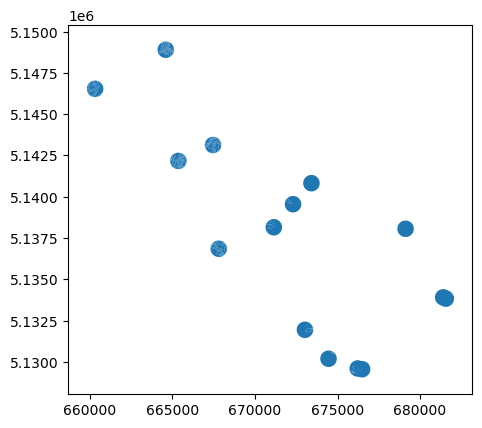

In [768]:
import geopandas as gpd
import pandas as pd

slope_500m = slope.overlay(buffered_camera_df_500m, how='intersection')
slope_500m["area"]=slope_500m["geometry"].area
# Initialize an empty list to store the results
all_sites = []

# Iterate over each unique site
for site in slope_500m['Site'].unique():
    # Filter the data for the current site
    slope_site = slope_500m[slope_500m["Site"] == site]

    # Dissolve by 'CL_PENT' and sum 'superficie'
    dissolved = slope_site.dissolve(by=['CL_PENT', 'Site'], aggfunc={'area':'sum'})

    # Store the result
    all_sites.append(dissolved)

# Concatenate all the results into a single GeoDataFrame
slope_500m_gdf = pd.concat(all_sites).reset_index()

# Save the GeoDataFrame
slope_500m_gdf.to_file(r"C:\Users\thier\Downloads\Projet\slope_500m_2.shp")
slope_500m_gdf.to_csv(r"C:\Users\thier\Downloads\Projet\slope_500m.csv")

# Print and plot the result
slope_500m_gdf, slope_500m_gdf.plot()


In [767]:
slope_500m_gdf['Site'] 

,CL_PENT,Site,geometry,area
0,A,5,MULTIPOLYGON Z (((665052.240 5141929.652 0.000...,121479.447847
1,B,5,MULTIPOLYGON Z (((665567.181 5141779.394 0.000...,314218.248235
2,C,5,MULTIPOLYGON Z (((665347.265 5141720.212 0.000...,169367.815454
3,D,5,MULTIPOLYGON Z (((665366.130 5142043.631 0.000...,136457.387227
4,F,5,MULTIPOLYGON Z (((665514.366 5141716.376 0.000...,42614.223874
5,A,12,"POLYGON Z ((672955.436 5140627.715 0.000, 6729...",784137.122636
6,A,14,"POLYGON Z ((679533.966 5138336.393 0.000, 6795...",784137.122636
7,A,2,MULTIPOLYGON Z (((659948.612 5146195.627 0.000...,237110.421865
8,B,2,MULTIPOLYGON Z (((660407.891 5146041.341 0.000...,296301.363750
9,C,2,MULTIPOLYGON Z (((660497.535 5146087.971 0.000...,223260.175832


In [ ]:
import geopandas as gpd
import pandas as pd

# Replace rivieres_500m with slope_500m, and ensure buffered_camera_df_500m is correct
slope_500m = slope.overlay(buffered_camera_df_500m, how='intersection')
slope_500m['superficie'] = slope_500m.geometry.area

# Ensure that 'Site' and other necessary columns are included
slope_500m_clean = slope_500m[['Site', 'superficie', 'geometry', 'CL_PENT', 'SHAPE_Area']]


slope_500m_sum = slope_500m_clean.dissolve(by='Site', aggfunc= {'CL_PENT':'sum'})

# Update the file paths in the to_file and to_csv methods
#slope_500m_sum.to_file(r"C:\Users\thier\Downloads\Projet\slope_buffers_500m.shp")
#slope_500m_sum.to_csv(r"C:\Users\thier\Downloads\Projet\slope_buffers_500m.csv")

# Print the result and plot it
print(slope_500m_sum)
slope_500m_sum.plot()


In [ ]:
import geopandas as gpd
import pandas as pd

# Assuming slope_500m is your prepared GeoDataFrame
slope_500m = slope.overlay(buffered_camera_df_500m, how='intersection')
slope_500m['superficie'] = slope_500m.geometry.area
slope_500m_clean = slope_500m[['Site', 'superficie', 'CL_PENT']]

#slope_500m_clean.dissolve(by='Site', aggfunc= {'CL_PENT':'sum'})

# Group by 'Site' and 'CL_PENT' and sum 'superficie'
slope_grouped = slope_500m_clean.groupby(['Site', 'CL_PENT']).sum().reset_index()

# Save the pivot table to a CSV file
slope_grouped.to_csv(r"C:\Users\thier\Downloads\Projet\slope_superficie_by_category_and_site_2.csv")

# Print the pivot table
print(slope_grouped)


In [ ]:
import geopandas as gpd
import pandas as pd

# Assuming slope_500m is your prepared GeoDataFrame
slope_500m = slope.overlay(buffered_camera_df_500m, how='intersection')
slope_500m['superficie'] = slope_500m.geometry.area
slope_500m_clean = slope_500m[['Site', 'superficie', 'CL_PENT', 'geometry']]

# Group by 'Site' and 'CL_PENT' and sum 'superficie'
grouped_non_spatial = slope_500m_clean.groupby(['Site', 'CL_PENT'])['superficie'].sum().reset_index()

# Get the first geometry for each 'Site' as a representative geometry
first_geometry = slope_500m_clean.groupby('Site')['geometry'].first().reset_index()

# Merge the non-spatial and spatial data
merged = pd.merge(grouped_non_spatial, first_geometry, on='Site', how='left')

# Convert back to a GeoDataFrame
gdf = gpd.GeoDataFrame(merged, geometry='geometry')

# Save the GeoDataFrame
gdf.to_file(r"C:\Users\thier\Downloads\Projet\slope_superficie_by_category_and_site.shp")
gdf.to_csv(r"C:\Users\thier\Downloads\Projet\slope_superficie_by_category_and_site.csv")

# Print and plot the result
print(gdf)
gdf.plot()


In [ ]:
grouped

In [ ]:
print(type(pivot_table))

In [ ]:
pivot_table = slope_500m_clean.pivot(index='Site', columns='CL_PENT', values='superficie').fillna(0)


In [ ]:
slope_500m_sum

In [ ]:
slope_500m_clean.to_file(r"C:\Users\thier\Downloads\Projet\slope_buffers_500m.shp")
slope_500m_clean.plot()


In [ ]:
# Export the grouped data to a CSV file
grouped_data.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\slope_buffers_500m.csv", index=False)

### Slope buffers 1km

In [ ]:
import geopandas as gpd
import pandas as pd

aggregated_results = pd.DataFrame()

for selected_buffer_index in range(len(buffered_camera_df_1km)):
    selected_buffer = buffered_camera_df_1km.iloc[selected_buffer_index:selected_buffer_index + 1]
    # Calculate the intersection
    clipped_shp = gpd.overlay(slope, selected_buffer, how='intersection')

    if 'id' in clipped_shp.columns and 'CL_PENT' in clipped_shp.columns and 'SUPERFICIE' in clipped_shp.columns:
        grouped_data = clipped_shp.groupby(['id', 'CL_PENT'])['SUPERFICIE'].sum().reset_index()
        
        # Append the grouped data to the aggregated_results DataFrame
        aggregated_results = pd.concat([aggregated_results, grouped_data], ignore_index=True)
        
# Export the grouped data to a CSV file
aggregated_results.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\slope_buffers_1km.csv", index=False)

In [ ]:
buffered_camera_df_1km

### Slope buffers 2km

In [ ]:
import geopandas as gpd
import pandas as pd

aggregated_results = pd.DataFrame()

for selected_buffer_index in range(len(buffered_camera_df_2km)):
    selected_buffer = buffered_camera_df_2km.iloc[selected_buffer_index:selected_buffer_index + 1]
    # Calculate the intersection
    clipped_shp = gpd.overlay(slope, selected_buffer, how='intersection')

    if 'id' in clipped_shp.columns and 'CL_PENT' in clipped_shp.columns and 'SUPERFICIE' in clipped_shp.columns:
        grouped_data = clipped_shp.groupby(['id', 'CL_PENT'])['SUPERFICIE'].sum().reset_index()
        
        # Append the grouped data to the aggregated_results DataFrame
        aggregated_results = pd.concat([aggregated_results, grouped_data], ignore_index=True)
        
# Export the grouped data to a CSV file
aggregated_results.to_file(r"C:\Users\thier\Downloads\Projet\Projet\slope_buffers_2km.shp")

## Landcover type

In [ ]:
import pandas as pd

In [ ]:
print("CRS of roads:", landcover.crs)
print("CRS of buffered_camera_df_500m:", buffered_camera_df_1km.crs)

In [ ]:
pd.set_option('display.max_columns', None)
landcover.head(20)

In [ ]:
landcover.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\landcover.csv", index=False)

In [ ]:
#Clip the rivers with the buffers
clip_rivers_500m = gpd.clip(roads, buffered_camera_df_1km)
clip_rivers_500m

### Landcover buffers 500m

In [ ]:
import geopandas as gpd
import pandas as pd

aggregated_results = pd.DataFrame()

for selected_buffer_index in range(len(buffered_camera_df_500m)):
    selected_buffer = buffered_camera_df_500m.iloc[selected_buffer_index:selected_buffer_index + 1]
    # Calculate the intersection
    clipped_shp = gpd.overlay(landcover, selected_buffer, how='intersection')

    if 'id' in clipped_shp.columns and 'CL_PENT' in clipped_shp.columns and 'SUPERFICIE' in clipped_shp.columns:
        grouped_data = clipped_shp.groupby(['id', 'TYPE_ECO'])['SUPERFICIE'].sum().reset_index()
        
        # Append the grouped data to the aggregated_results DataFrame
        aggregated_results = pd.concat([aggregated_results, grouped_data], ignore_index=True)
        
# Export the grouped data to a CSV file
aggregated_results.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\landcover_buffers_500m.csv", index=False)
aggregated_results


### Landcover buffers 1km

In [ ]:
import geopandas as gpd
import pandas as pd

aggregated_results = pd.DataFrame()

for selected_buffer_index in range(len(buffered_camera_df_1km)):
    selected_buffer = buffered_camera_df_1km.iloc[selected_buffer_index:selected_buffer_index + 1]
    # Calculate the intersection
    clipped_shp = gpd.overlay(landcover, selected_buffer, how='intersection')

    if 'id' in clipped_shp.columns and 'CL_PENT' in clipped_shp.columns and 'SUPERFICIE' in clipped_shp.columns:
        grouped_data = clipped_shp.groupby(['id', 'TYPE_ECO'])['SUPERFICIE'].sum().reset_index()
        
        # Append the grouped data to the aggregated_results DataFrame
        aggregated_results = pd.concat([aggregated_results, grouped_data], ignore_index=True)
        
# Export the grouped data to a CSV file
aggregated_results.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\landcover_buffers_1km.csv", index=False)
aggregated_results

### Landcover buffers 2km

In [ ]:
import geopandas as gpd
import pandas as pd

aggregated_results = pd.DataFrame()

for selected_buffer_index in range(len(buffered_camera_df_2km)):
    selected_buffer = buffered_camera_df_2km.iloc[selected_buffer_index:selected_buffer_index + 1]
    # Calculate the intersection
    clipped_shp = gpd.overlay(landcover, selected_buffer, how='intersection')

    if 'id' in clipped_shp.columns and 'CL_PENT' in clipped_shp.columns and 'SUPERFICIE' in clipped_shp.columns:
        grouped_data = clipped_shp.groupby(['id', 'TYPE_ECO'])['SUPERFICIE'].sum().reset_index()
        
        # Append the grouped data to the aggregated_results DataFrame
        aggregated_results = pd.concat([aggregated_results, grouped_data], ignore_index=True)
        
# Export the grouped data to a CSV file
aggregated_results.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\landcover_buffers_2km.csv", index=False)
aggregated_results

## Utilisation du sol

### Check projection first


In [ ]:
print("CRS of roads:", sol.crs)
print("CRS of buffered_camera_df_500m:", buffered_camera_df_500m.crs)

### Sol buffers 500m

In [ ]:
buffered_camera_df_500m

In [ ]:
import geopandas as gpd
import pandas as pd

aggregated_results = pd.DataFrame()

for selected_buffer_index in range(len(buffered_camera_df_500m)):
    selected_buffer = buffered_camera_df_500m.iloc[selected_buffer_index:selected_buffer_index + 1]
    clipped_shp = gpd.overlay(sol, selected_buffer, how='intersection')

    if 'Camera' in clipped_shp.columns and 'DESC_CAT' in clipped_shp.columns and 'Shape_Area' in clipped_shp.columns:
        grouped_data = clipped_shp.groupby(['Camera', 'DESC_CAT'])['Shape_Area'].sum().reset_index()
        grouped_data = grouped_data.rename(columns={'Shape_Area': 'Superficie_m2', 'DESC_CAT': 'Type sol'})
        aggregated_results = pd.concat([aggregated_results, grouped_data], ignore_index=True)
        
# Export the file
aggregated_results.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\sol_buffers_500m_4.csv", index=False)
aggregated_results

In [ ]:
import fiona
fiona.supported_drivers 

In [ ]:
roads

In [ ]:
#Clip the roads with the buffers
sol_500m = gpd.overlay(roads, buffered_camera_df_500m, how='intersection')
#Clean the dataframe    
df_clean = ["Camera", "Shape_Leng", "geometry", "ClsRte"]
sol_500m= sol_500m[df_clean]
#Aggregate the data
df_sol_500m = sol_500m.dissolve(by='Camera', aggfunc='sum').drop(columns="ClsRte").reset_index()
#Export the file in shp or csv
#df_sol_500m.to_file(r"C:\Users\thier\Downloads\Projet\Projet\sol_buffers_500m_9.shp")
df_sol_500m.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\sol_buffers_500m_9.csv", index=False)


In [ ]:
test3 = df_sol_500m.rename(columns={'Shape_Leng': 'Longueur_m2'})

In [ ]:
test3

In [ ]:
print(type(df_sol_500m))

In [ ]:
grouped_sol_500m = grouped_sol_500m.rename(columns={'Shape_Area': 'Superficie_m2', 'DESC_CAT': 'Type sol'})


In [ ]:
import geopandas as gpd

# Create a GeoDataFrame from grouped_sol_500m
grouped_sol_500m_gdf = gpd.GeoDataFrame(grouped_sol_500m)

# Now you have a GeoDataFrame with the "geometry" column assigned


In [ ]:
grouped_sol_500m.to_file(r"C:\Users\thier\Downloads\Projet\Projet\roads_buffers_500m_5.shp")

In [ ]:
grouped_sol_500m.to_file(r"C:\Users\thier\Downloads\Projet\Projet\sol_buffers_500m_5.shp")

### Sol buffer 1km

In [ ]:
import geopandas as gpd
import pandas as pd

aggregated_results = pd.DataFrame()

for selected_buffer_index in range(len(buffered_camera_df_1km)):
    selected_buffer = buffered_camera_df_1km.iloc[selected_buffer_index:selected_buffer_index + 1]
    clipped_shp = gpd.overlay(sol, selected_buffer, how='intersection')

    if 'id' in clipped_shp.columns and 'DESC_CAT' in clipped_shp.columns and 'Shape_Area' in clipped_shp.columns:
        grouped_data = clipped_shp.groupby(['id', 'DESC_CAT'])['Shape_Area'].sum().reset_index()
        grouped_data = grouped_data.rename(columns={'Shape_Area': 'Superficie_m2', 'DESC_CAT': 'Type sol'})
        aggregated_results = pd.concat([aggregated_results, grouped_data], ignore_index=True)
        
# Export the file
aggregated_results.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\sol_buffers_1km.csv", index=False)
aggregated_results

### Sol buffer 2km

In [ ]:
import geopandas as gpd
import pandas as pd

aggregated_results = pd.DataFrame()

for selected_buffer_index in range(len(buffered_camera_df_2km)):
    selected_buffer = buffered_camera_df_2km.iloc[selected_buffer_index:selected_buffer_index + 1]
    clipped_shp = gpd.overlay(sol, selected_buffer, how='intersection')

    if 'id' in clipped_shp.columns and 'id' in clipped_shp.columns and 'Shape_Area' in clipped_shp.columns:
        grouped_data = clipped_shp.groupby(['Site', 'DESC_CAT'])['Shape_Area'].sum().reset_index()
        grouped_data = grouped_data.rename(columns={'Shape_Area': 'Superficie_m2', 'DESC_CAT': 'Type sol'})
        aggregated_results = pd.concat([aggregated_results, grouped_data], ignore_index=True)
        
# Export the file
aggregated_results.to_csv(r"C:\Users\thier\Downloads\Projet\Projet\sol_buffers_2km.csv", index=False)
aggregated_results

In [ ]:
import geopandas as gpd
import pandas as pd

def process_buffers(buffer_df, buffer_name, rivers_gdf, output_csv_path):
    results_df = pd.DataFrame(columns=["Buffer Index", "Clipped Length"])
    clipped_results_gdf = gpd.GeoDataFrame()

    for selected_buffer_index in range(len(buffer_df)):
        selected_buffer = buffer_df.iloc[selected_buffer_index:selected_buffer_index + 1]
        clipped_shp = gpd.overlay(rivers_gdf, selected_buffer, how='intersection')
        clipped_length = clipped_shp.length.sum()
        print(f"{buffer_name} - Buffer Index {selected_buffer_index}: Clipped Length = {clipped_length}")

        results_df = pd.concat([results_df, pd.DataFrame({"Buffer Index": [selected_buffer_index], "Clipped Length": [clipped_length]})], ignore_index=True)
        clipped_results_gdf = gpd.GeoDataFrame(pd.concat([clipped_results_gdf, clipped_shp]), crs=rivers_gdf.crs)

    results_df.to_csv(output_csv_path, index=False)
    # Optionally save the GeoDataFrame as well
    # clipped_results_gdf.to_file(output_csv_path.replace('.csv', '.shp'))

# Assuming 'rivieres' is your rivers GeoDataFrame
# And you have buffered_camera_df_500m, buffered_camera_df_1km, buffered_camera_df_2km defined

process_buffers(buffered_camera_df_500m, "Rivers buffers 500m", rivieres, r"C:\Users\thier\Downloads\Projet\Projet\rivers_buffers_500m_test.csv")
process_buffers(buffered_camera_df_1km, "Rivers buffers 1km", rivieres, r"C:\Users\thier\Downloads\Projet\Projet\rivers_buffers_1km_test.csv")
process_buffers(buffered_camera_df_2km, "Rivers buffers 2km", rivieres, r"C:\Users\thier\Downloads\Projet\\Projet\rivers_buffers_2km_test.csv")
